In [2]:
#importing libraries

from rdkit import Chem
import networkx as nx
import matplotlib.pyplot as plt 
import pandas as pd
from chembl_webresource_client import new_client

## Section 1. Spectral clustering with molecules dataFrame for similarity based on Salbutamol

In [3]:
#Target 1. salbutamol 
salbutamol_smiles = ' CC(C)(C)NCC(O)c1ccc(O)c(CO)c1.O=S(=O)(O)O'

In [4]:
#Obtaining the data  
res1 = []
from chembl_webresource_client.new_client import new_client
similarity = new_client.similarity
res2 = similarity.filter(chembl_id = 'CHEMBL714', similarity = 60).only(['pref_name', 'molecule_structures', 'similarity', 'indication_class', 'molecule_properties', 'development_phase'])
for i in res2: 
    smiles = i['molecule_structures']['canonical_smiles']
    clas = i['indication_class']
    alogp = i['molecule_properties']['alogp']
    name = i['pref_name']
    similarity = i['similarity']
    hba_lipinski = i['molecule_properties']['hba_lipinski']
    dic = {'Name':name,'Smiles': smiles, 'similarity': similarity, 'Class': clas, 'AlogP': alogp,'Lipinski': hba_lipinski}
    res1.append(dic)
data = pd.DataFrame(res1)

In [5]:
#Visualization 
data = data.fillna(0.00001)

In [6]:
data

,Name,Smiles,similarity,Class,AlogP,Lipinski
0,ALBUTEROL SULFATE,CC(C)(C)NCC(O)c1ccc(O)c(CO)c1.O=S(=O)(O)O,100,Bronchodilator,1.31,4.00000
1,LEVALBUTEROL TARTRATE,CC(C)(C)NC[C@H](O)c1ccc(O)c(CO)c1.CC(C)(C)NC[C...,100,0.00001,1.31,4.00000
2,LEVALBUTEROL SULFATE,CC(C)(C)NC[C@H](O)c1ccc(O)c(CO)c1.CC(C)(C)NC[C...,100,0.00001,1.31,4.00000
3,LEVOSALBUTAMOL,CC(C)(C)NC[C@H](O)c1ccc(O)c(CO)c1,100,Bronchodilator; Asthma Prophylactic,1.31,4.00000
4,(S)-ALBUTEROL,CC(C)(C)NC[C@@H](O)c1ccc(O)c(CO)c1,100,0.00001,1.31,4.00000
5,0.00001,CC(C)(C)NCC(O)c1ccc(O)c(CO)c1.Cl,100,0.00001,1.31,4.00000
6,ALBUTEROL SULFATE,CC(C)(C)NCC(O)c1ccc(O)c(CO)c1.CC(C)(C)NCC(O)c1...,100,0.00001,1.31,4.00000
7,LEVALBUTEROL HYDROCHLORIDE,CC(C)(C)NC[C@H](O)c1ccc(O)c(CO)c1.Cl,100,Bronchodilator; Asthma Prophylactic,1.31,4.00000
8,0.00001,COCc1cc(C(O)CNC(C)(C)C)ccc1O,72.500002384185791015625,0.00001,1.96,4.00000
9,0.00001,COCc1cc(C(O)CNC(C)(C)C)ccc1O.Cl,72.500002384185791015625,0.00001,1.96,4.00000


In [7]:
data_clustering = data.drop(columns=['Name', 'Smiles','Class'])

In [8]:
data_clustering

,similarity,AlogP,Lipinski
0,100,1.31,4.00000
1,100,1.31,4.00000
2,100,1.31,4.00000
3,100,1.31,4.00000
4,100,1.31,4.00000
5,100,1.31,4.00000
6,100,1.31,4.00000
7,100,1.31,4.00000
8,72.500002384185791015625,1.96,4.00000
9,72.500002384185791015625,1.96,4.00000


In [9]:
names = data.Name
names = list(names.replace(0, 'Not named'))

In [10]:
data_clustering

,similarity,AlogP,Lipinski
0,100,1.31,4.00000
1,100,1.31,4.00000
2,100,1.31,4.00000
3,100,1.31,4.00000
4,100,1.31,4.00000
5,100,1.31,4.00000
6,100,1.31,4.00000
7,100,1.31,4.00000
8,72.500002384185791015625,1.96,4.00000
9,72.500002384185791015625,1.96,4.00000


'for i, label in enumerate(names):\n    plt.annotate(label, (data_clustering.similarity[i], data_clustering.Lipinski[i]), fontsize = 8)'

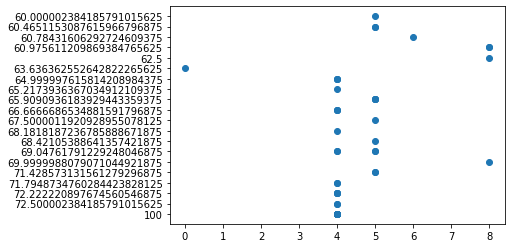

In [11]:
plt.scatter(data_clustering.Lipinski,data_clustering.similarity)
'''for i, label in enumerate(names):
    plt.annotate(label, (data_clustering.similarity[i], data_clustering.Lipinski[i]), fontsize = 8)'''

c:\Users\Fernando.DESKTOP-608G9HT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


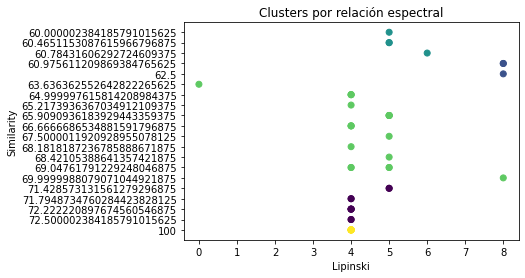

In [12]:
#Spectral clustering 
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters= 5).fit(data_clustering)
labels = sc.labels_
plt.scatter(data_clustering.Lipinski, data.similarity, c = labels)
plt.xlabel("Lipinski")
plt.ylabel("Similarity")
plt.title("Clusters por relación espectral")
plt.show()

In [13]:
colterol_messylate = data.iloc[11].to_dict()
colterol = data.iloc[12].to_dict()
mol1 = data.iloc[9].to_dict()
mol2 = data.iloc[13].to_dict()

In [14]:
molecule_list = [colterol_messylate, colterol, mol1, mol2]

## Section 2. Calculating graph interactions with Fieldler vectors

In [15]:
class Preprocessing():    
    def smileToMol(self, smile): 
        return Chem.MolFromSmiles(smile)
    def mol_to_nx(self, mol):
        G = nx.Graph()
        for atom in mol.GetAtoms():
            G.add_node(atom.GetIdx(),
                    atomic_num=atom.GetAtomicNum(),
                    is_aromatic=atom.GetIsAromatic(),
                    atom_symbol=atom.GetSymbol())
            
        for bond in mol.GetBonds():
            G.add_edge(bond.GetBeginAtomIdx(),
                    bond.GetEndAtomIdx(),
                    bond_type=bond.GetBondType())
            
        return G
    def rdkiToNX_Visualization(self, mol, color_map): 
        #Extracting characteristics from the molecule 
        mol_nx = self.mol_to_nx(mol)
        mol_atom = nx.get_node_attributes(mol_nx, 'atom_symbol')
        #Visualizing the molecule 
        mol_colors = []
        for idx in mol_nx.nodes():
            if (mol_nx.nodes[idx]['atom_symbol'] in color_map):
                mol_colors.append(color_map[mol_nx.nodes[idx]['atom_symbol']])
            else:
                mol_colors.append('gray')
            
        network = nx.draw(mol_nx,
                labels= mol_atom,
                with_labels = True,
                node_color= mol_colors,
                node_size= 300)
        mol = Chem.Draw.MolToMPL(mol)
        plt.show(network, mol)
        return mol_nx, mol_atom
    #Get the adjacency matrix from the graph 
    def getAdjacencyMatrix(self, graph): 
        return nx.to_numpy_matrix(graph)

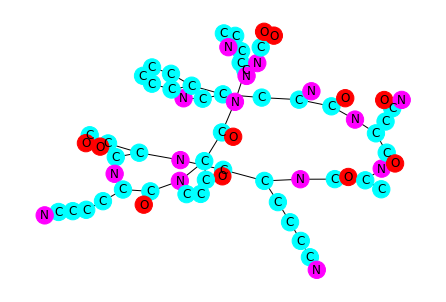

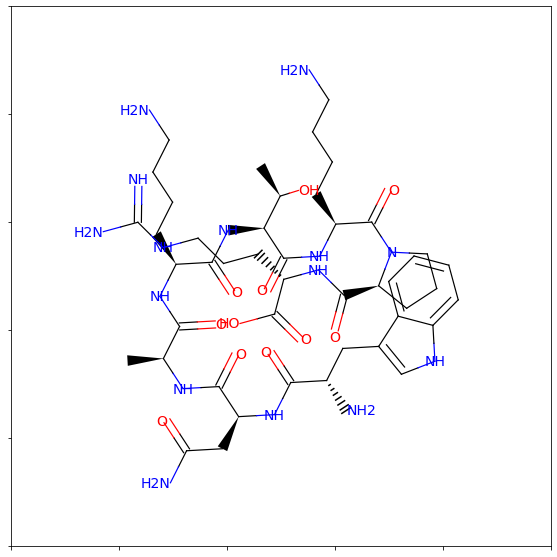

In [16]:
objPre = Preprocessing()
Einmunoglobulin = 'C[C@@H](O)[C@H](NC(=O)[C@H](CCCCN)NC(=O)[C@H](C)NC(=O)[C@H](CC(=O)N)NC(=O)[C@@H](N)Cc1c[nH]c2ccccc12)C(=O)N[C@@H](CCCCN)C(=O)N3CCC[C@H]3C(=O)N[C@@H](CCCNC(=N)N)C(=O)O'
Einmunoglobulin_mol = objPre.smileToMol(Einmunoglobulin)
Einmuno_nx, Einmuno_atom = objPre.rdkiToNX_Visualization(Einmunoglobulin_mol, {'C': 'cyan', 'O': 'red', 'N': 'magenta'})

In [17]:
adjInmuno = objPre.getAdjacencyMatrix(Einmuno_nx)

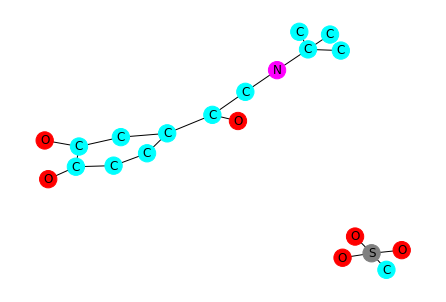

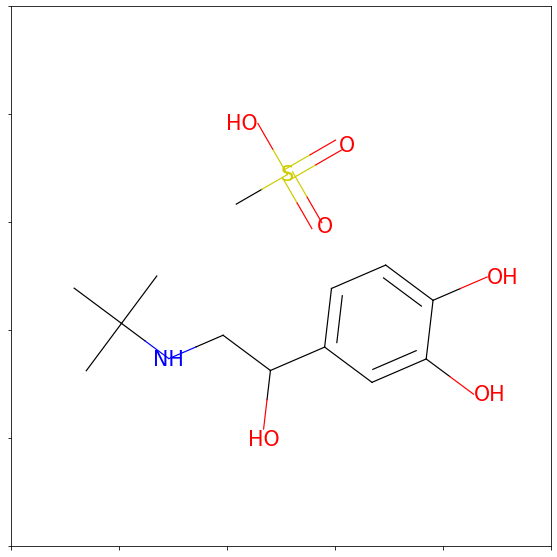

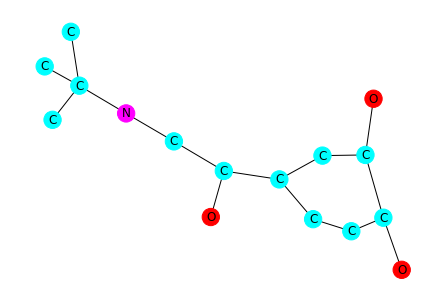

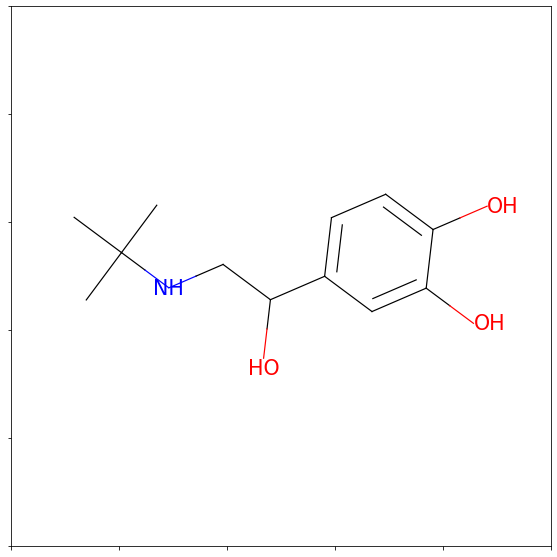

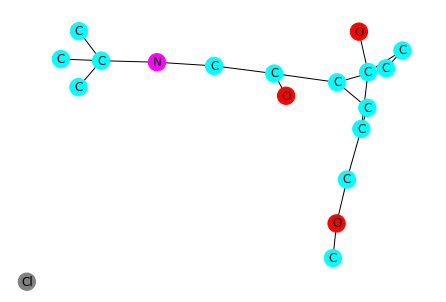

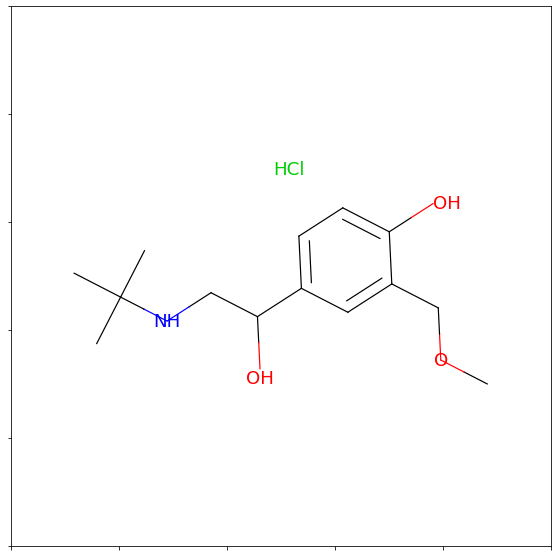

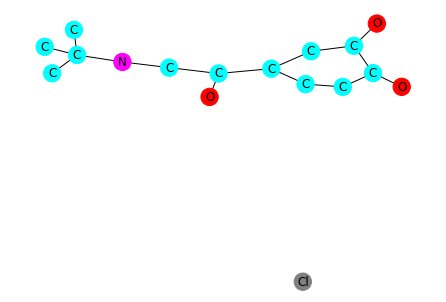

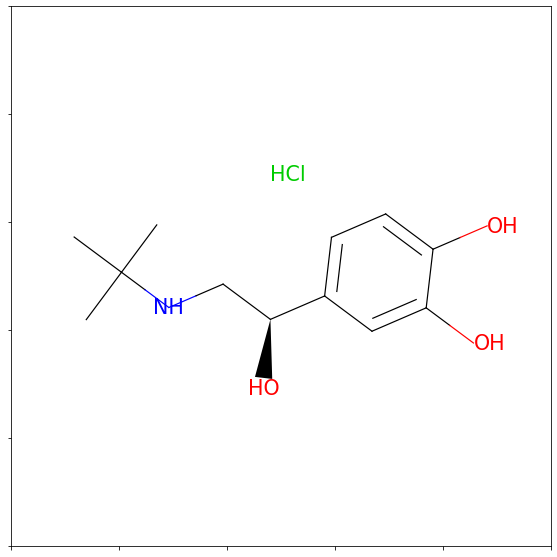

In [18]:
#code needs changes and reduction 
molecule_list_networks = []
for i in molecule_list:
    mol = objPre.smileToMol(i['Smiles'])
    mol_nx, mol_atom = objPre.rdkiToNX_Visualization(mol, {'C': 'cyan', 'O': 'red', 'N': 'magenta'})
    adjmol = objPre.getAdjacencyMatrix(mol_nx)
    molecule_list_networks.append({'Graph': mol_nx, 'Adjacency': adjmol, 'Molecule': mol_atom})

<class 'networkx.utils.decorators.argmap'> compilation 21:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


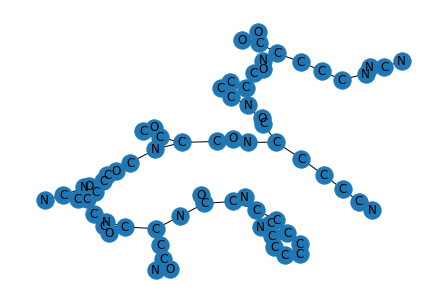

In [19]:
fiedler_list = []
graph = nx.compose(molecule_list_networks[0]['Graph'],Einmuno_nx)
fied = nx.fiedler_vector(graph, normalized=True)
fiedler_list.append(fied)
mol_atom = nx.get_node_attributes(graph, 'atom_symbol')    
network = nx.draw(graph,
                labels= mol_atom,
                with_labels = True,
                node_size= 300)

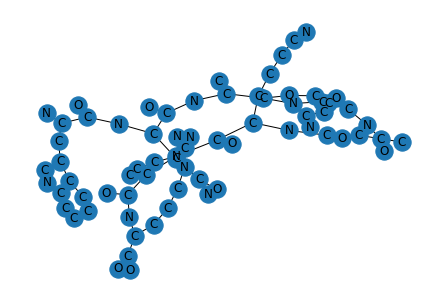

In [20]:
graph = nx.compose(molecule_list_networks[1]['Graph'],Einmuno_nx)
fied = nx.fiedler_vector(graph, normalized=True)
fiedler_list.append(fied)
mol_atom = nx.get_node_attributes(graph, 'atom_symbol')    
network = nx.draw(graph,
                labels= mol_atom,
                with_labels = True,
                node_size= 300)

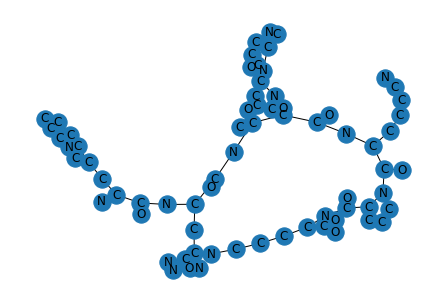

In [21]:
graph = nx.compose(molecule_list_networks[2]['Graph'],Einmuno_nx)
fied = nx.fiedler_vector(graph, normalized=True)
fiedler_list.append(fied)
mol_atom = nx.get_node_attributes(graph, 'atom_symbol')    
network = nx.draw(graph,
                labels= mol_atom,
                with_labels = True,
                node_size= 300)

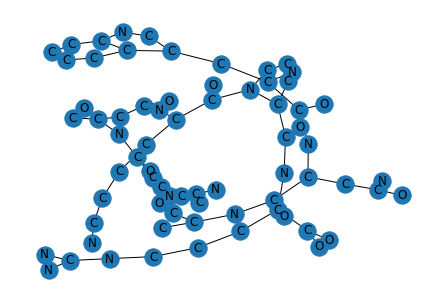

In [22]:
graph = nx.compose(molecule_list_networks[3]['Graph'],Einmuno_nx)
fied = nx.fiedler_vector(graph, normalized=True)
fiedler_list.append(fied)
mol_atom = nx.get_node_attributes(graph, 'atom_symbol')    
network = nx.draw(graph,
                labels= mol_atom,
                with_labels = True,
                node_size= 300)

In [23]:
for i in fiedler_list: 
    print('Node interactions: \n', i)

Node interactions: 
 [-0.01118445 -0.02230843 -0.01118445 -0.02781082 -0.01051483  0.01567128
  0.02707253  0.03502094  0.04041189  0.03056288  0.03238498  0.04168048
  0.02412947  0.04993684  0.05572996  0.04477915  0.07871216  0.10441959
  0.0893381   0.11333099  0.07719516  0.11721618  0.09757271  0.12114101
  0.0701304   0.0701304   0.10863377  0.14816172  0.0857731   0.16167144
  0.09359409  0.14160633  0.18425404  0.15333729  0.15540268  0.19182907
  0.15804574  0.15860913  0.15831489  0.15716463  0.19003701 -0.0533724
 -0.03089811 -0.06397774 -0.10291674 -0.08618302 -0.08786886 -0.0890796
 -0.08980866 -0.06367647 -0.12400687 -0.07178949 -0.14375505 -0.12120947
 -0.12438804 -0.12689402 -0.15764166 -0.17247855 -0.09985049 -0.15141844
 -0.19741662 -0.16744297 -0.17279057 -0.17720386 -0.180659   -0.22429646
 -0.12984868 -0.12984868 -0.20012479 -0.11585532 -0.11585532]
Node interactions: 
 [-0.01442825 -0.02878186 -0.01442825 -0.032729   -0.01673549  0.0075782
  0.01817753  0.0245186

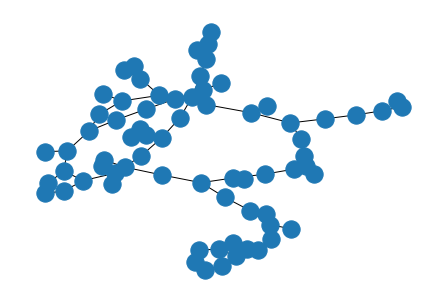

In [24]:
nx.draw(Einmuno_nx)

In [25]:
fiedler_list[1]

array([-0.01442825, -0.02878186, -0.01442825, -0.032729  , -0.01673549,
        0.0075782 ,  0.01817753,  0.02451864,  0.02953676,  0.02269622,
        0.0243894 ,  0.03178998,  0.01840155,  0.03854398,  0.04530587,
        0.0348453 ,  0.06734071,  0.03898   ,  0.07240561,  0.10955737,
        0.063417  ,  0.12930214,  0.10754151,  0.13343836,  0.07724045,
        0.07724045,  0.11891035,  0.1612142 ,  0.09331842,  0.17512458,
        0.10137041,  0.15286612,  0.19835092,  0.16492901,  0.16705202,
        0.20613789,  0.16976787,  0.17034667,  0.17004429,  0.16886228,
        0.20429574, -0.05627174, -0.03257275, -0.06469259, -0.10178225,
       -0.08513616, -0.08672707, -0.08786935, -0.08855708, -0.0627817 ,
       -0.12105498, -0.07007237, -0.1390745 , -0.11705819, -0.11995701,
       -0.1222353 , -0.15172296, -0.16521006, -0.09563142, -0.14450913,
       -0.18784804, -0.15904372, -0.16388744, -0.16788339, -0.1710109 ,
       -0.21219168, -0.12282661, -0.12282661, -0.19031175, -0.11

array([-0.32864129, -0.32864129, -0.32864129, -0.32864129, -0.26072899,
        0.26072899,  0.32864129,  0.32864129,  0.32864129,  0.32864129])

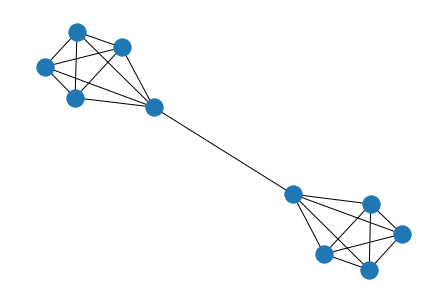

In [26]:
G = nx.barbell_graph(5, 0)
nx.draw(G)
nx.fiedler_vector(G, normalized=True, seed=1)
